# **EXTRAÇÃO DE FEATURES**

Neste colab iremos usar além da biblioteca pandas, a sckit-learn (sklearn), usada para mineração e análise de dados.


O dataset que usaremos para todos os exemplos de algoritimos será o iris dataset









In [0]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

Verificando dados carregados:


In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Podemos ver que o iris dataset tem 4 features. Ao extrair features acabamos reduzindo dimensionalidade dos dados, ou seja o número de features. Existem alguns algoritimos para este fim, os que iremos abordar são:


*   ***Análise de Componentes Principais (PCA)***
*   ***Análise Discriminante Lineare (LDA)***
*   ***Análise de Componentes Independentes (ICA)***
*   ***Incorporação estocástica de vizinhos distribuída em T (t-SNE)***
 
















## **PCA** 

> Uma técninca de redução de dimensionalidade linear não supervisionada que utiliza uma transformação ortogonal para converter um conjunto de observações de variáveis possivelmente correlacionadas num conjunto de valores de variáveis linearmente não correlacionadas chamadas de componentes principais. O número de componentes principais é sempre menor ou igual ao número de variáveis originais. 



In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
componentes = pca.fit_transform(x)



PCAdf = pd.DataFrame(data = componentes
             , columns = ['componente 1', 'componente 2','componente 3'])

PCAdf.head()

,componente 1,componente 2,componente 3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


Juntanto as duas componentes com o target:

In [17]:
finaldf = pd.concat([PCAdf, df[['target']]], axis = 1)

finaldf.head()

,principal componente 1,principal componente 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Podemos ver que reduzimos o número de features do dataset para apenas 2 componentes, elas juntas contém 95.8% da informação inicial.

**SCREE PLOT**

Nos mostra a valor da variação de cada componente principal em relação aos dados originais


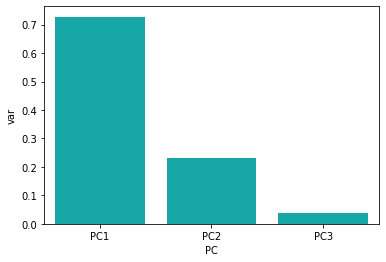

In [35]:
import seaborn as sns

df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

## ***LDA***

> Trata-se também de um método de redução de dimensionalidade que utiliza informações das categorias (SUPERVISIONADO) associadas a cada padrão para extrair linearmente as características mais discriminantes.


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lda = LDA(n_components=2)

X_test

Reduzindo para 2 features:

In [0]:
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

X_test

## ***ICA***

> Um algoritmo de redução de dimensionalidade que transforma um conjunto de variáveis ​​em um novo conjunto de componentes. Faz isso de modo que a independência estatística entre os novos componentes seja maximizada. Isso é semelhante ao (PCA), que mapeia uma coleção de variáveis ​​para componentes estatisticamente não correlacionados, exceto que o ICA vai um passo além ao maximizar a independência estatística em vez de apenas desenvolver componentes não correlacionados. Se falarmos de imagem, significa que encontrará as curvas e as bordas dentro de uma imagem. Por exemplo, no reconhecimento facial, o ICA identificará os olhos, o nariz, a boca etc. como componentes independentes.

In [24]:
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=2,random_state=0)
x = transformer.fit_transform(x)
x

array([[ 1.06741931e-01, -4.69244306e-02],
       [ 1.01807958e-01,  5.20944589e-02],
       [ 1.14231910e-01,  2.29622479e-02],
       [ 1.11975936e-01,  4.49120432e-02],
       [ 1.12161655e-01, -6.15128230e-02],
       [ 9.43366937e-02, -1.32692648e-01],
       [ 1.16737490e-01, -1.05863853e-02],
       [ 1.06070460e-01, -2.49300614e-02],
       [ 1.15386504e-01,  8.90345033e-02],
       [ 1.06059787e-01,  3.43382164e-02],
       [ 1.00164984e-01, -9.47721660e-02],
       [ 1.10818713e-01, -1.75240846e-02],
       [ 1.08557323e-01,  5.64217334e-02],
       [ 1.29142727e-01,  7.51818317e-02],
       [ 9.90130188e-02, -1.64480549e-01],
       [ 9.92732957e-02, -2.35347665e-01],
       [ 1.00674709e-01, -1.32514352e-01],
       [ 1.03158944e-01, -4.75264297e-02],
       [ 8.61671994e-02, -1.24952807e-01],
       [ 1.08334478e-01, -1.02512007e-01],
       [ 9.02359380e-02, -3.99203105e-02],
       [ 1.02498145e-01, -8.48003383e-02],
       [ 1.31165184e-01, -4.64334261e-02],
       [ 8.

## ***t-SNE***

> O objetivo do t-SNE é a partir de um conjunto de pontos em um espaço multi-dimensional encontrar uma representação fiel desses pontos em um espaço de dimensão menor, geralmente um plano 2D. O algoritmo é não-linear e se adapta aos dados, realizando diferentes transformações em diferentes regiões do espaço multi-dimensional. 

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=1000, random_state=40)
points = tsne.fit_transform(df[features])

points

array([[-23.688068  , -15.477541  ],
       [-21.20942   , -16.2366    ],
       [-20.926683  , -15.07555   ],
       [-20.665604  , -15.33166   ],
       [-23.805042  , -15.010034  ],
       [-25.64361   , -14.838191  ],
       [-21.113174  , -14.414296  ],
       [-22.925926  , -15.291923  ],
       [-19.896925  , -15.588563  ],
       [-21.63307   , -15.842318  ],
       [-25.164024  , -15.550791  ],
       [-22.18321   , -14.755537  ],
       [-20.886074  , -15.997569  ],
       [-19.599022  , -15.0634    ],
       [-26.454868  , -15.663925  ],
       [-26.665918  , -15.100406  ],
       [-25.767153  , -15.2934675 ],
       [-23.754993  , -15.250099  ],
       [-25.930326  , -15.818552  ],
       [-24.791939  , -14.709664  ],
       [-24.471941  , -16.269178  ],
       [-24.424177  , -14.690731  ],
       [-20.758722  , -13.723616  ],
       [-23.223091  , -14.196586  ],
       [-22.25568   , -14.123754  ],
       [-21.631374  , -16.42066   ],
       [-23.134655  , -14.589046  ],
 